<a href="https://colab.research.google.com/github/esa-prakasa/ConvNet/blob/master/Image_Classification_with_Pytorch_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification with Pytorch - Part 1

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.nn import functional as F
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
torch.manual_seed(0) # for REPRODUCIBILITY

## Load MNIST Dataset

In [ ]:
mnist_data_train = datasets.MNIST('data', 
                            train=True, 
                            download=True, 
                            transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(mnist_data_train, batch_size=4,
                                          shuffle=True)
mnist_data_test = datasets.MNIST('data', 
                            train=False, 
                            download=True, 
                            transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(mnist_data_test, batch_size=4,
                                          shuffle=True)

#### Single Image visualization

In [ ]:
def imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [ ]:
images[0].shape

torch.Size([1, 28, 28])

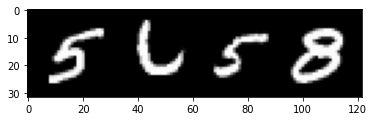

In [ ]:
imshow(torchvision.utils.make_grid(images)) # image preview

In [ ]:
print("label is:")
print(' '.join('%5s' % int(labels[j]) for j in range(4))) #label

label is:
    5     6     5     8


## Define model (simple logistic regression)

In [ ]:
# define model
class MulticlassLogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MulticlassLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = x.reshape(-1, 28 * 28)
        out = self.linear(x)
        return out